In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data-resource_2016_11_20_Road Accident and casualties Statistics (2009-2016).csv')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Road Accident and casualties Statistics (2009-...,NaN,NaN,NaN
1,Year,Number of Accidents,Death,Injury
2,2009,3381,2958,2686
3,2010,2827,2646,1803
4,2011,2667,2546,1641
5,2012,2636,2538,2134
6,2013,2029,1957,1396
7,2014,2027,2067,1535
8,2015,2394,2376,1958
9,2016(Up to July),1489,1422,1289


In [3]:
df.drop([0],axis=0,inplace=True)

In [4]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
1,Year,Number of Accidents,Death,Injury
2,2009,3381,2958,2686
3,2010,2827,2646,1803
4,2011,2667,2546,1641
5,2012,2636,2538,2134
6,2013,2029,1957,1396
7,2014,2027,2067,1535
8,2015,2394,2376,1958
9,2016(Up to July),1489,1422,1289


In [6]:
df.columns = df.iloc[0]
df.drop(df.index[0])
headers = df.iloc[0]
new_df  = pd.DataFrame(df.values[1:], columns=headers)

In [7]:
new_df

1,Year,Number of Accidents,Death,Injury
0,2009,3381,2958,2686
1,2010,2827,2646,1803
2,2011,2667,2546,1641
3,2012,2636,2538,2134
4,2013,2029,1957,1396
5,2014,2027,2067,1535
6,2015,2394,2376,1958
7,2016(Up to July),1489,1422,1289


In [8]:
print(new_df.columns)

Index(['Year', 'Number of Accidents', 'Death', 'Injury'], dtype='object', name=1)


In [9]:
new_df['Year']=new_df['Year'].apply(lambda x: int(x.split('(')[0]))

In [71]:
new_df

1,Year,Number of Accidents,Death,Injury
0,2009,3381,2958,2686
1,2010,2827,2646,1803
2,2011,2667,2546,1641
3,2012,2636,2538,2134
4,2013,2029,1957,1396
5,2014,2027,2067,1535
6,2015,2394,2376,1958
7,2016,1489,1422,1289


In [72]:
new_df[['Year','Number of Accidents','Death','Injury']]=new_df[['Year','Number of Accidents','Death','Injury']].astype(int)

In [73]:
new_df.dtypes

1
Year                   int32
Number of Accidents    int32
Death                  int32
Injury                 int32
dtype: object

In [74]:
import numpy as np
new_df[['Change in Number of Accident','Change in Number of Death']]=(new_df[['Number of Accidents','Death']].pct_change(periods=1))*100

In [75]:
new_df

1,Year,Number of Accidents,Death,Injury,Change in Number of Accident,Change in Number of Death
0,2009,3381,2958,2686,NaN,NaN
1,2010,2827,2646,1803,-16.385685,-10.547667
2,2011,2667,2546,1641,-5.659710,-3.779289
3,2012,2636,2538,2134,-1.162355,-0.314218
4,2013,2029,1957,1396,-23.027314,-22.892041
5,2014,2027,2067,1535,-0.098571,5.620848
6,2015,2394,2376,1958,18.105575,14.949202
7,2016,1489,1422,1289,-37.802840,-40.151515


In [76]:
new_df=new_df.fillna(0)

In [77]:
new_df.dtypes

1
Year                              int32
Number of Accidents               int32
Death                             int32
Injury                            int32
Change in Number of Accident    float64
Change in Number of Death       float64
dtype: object

In [78]:
new_df['Total_Number_of_Accident_victims']=new_df['Death']+new_df['Injury']

In [79]:
new_df

1,Year,Number of Accidents,Death,Injury,Change in Number of Accident,Change in Number of Death,Total_Number_of_Accident_victims
0,2009,3381,2958,2686,0.000000,0.000000,5644
1,2010,2827,2646,1803,-16.385685,-10.547667,4449
2,2011,2667,2546,1641,-5.659710,-3.779289,4187
3,2012,2636,2538,2134,-1.162355,-0.314218,4672
4,2013,2029,1957,1396,-23.027314,-22.892041,3353
5,2014,2027,2067,1535,-0.098571,5.620848,3602
6,2015,2394,2376,1958,18.105575,14.949202,4334
7,2016,1489,1422,1289,-37.802840,-40.151515,2711


In [80]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Casualities')

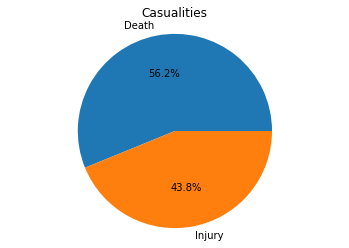

In [81]:
labels = ['Death', 'Injury']
sizes = [ new_df.Death.sum(),new_df.Injury.sum()]
ig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Casualities')




In [82]:
%matplotlib inline
ypos=np.arange(len(new_df.Year))
ypos

array([0, 1, 2, 3, 4, 5, 6, 7])

Text(0, 0.5, 'Accidents over the year')

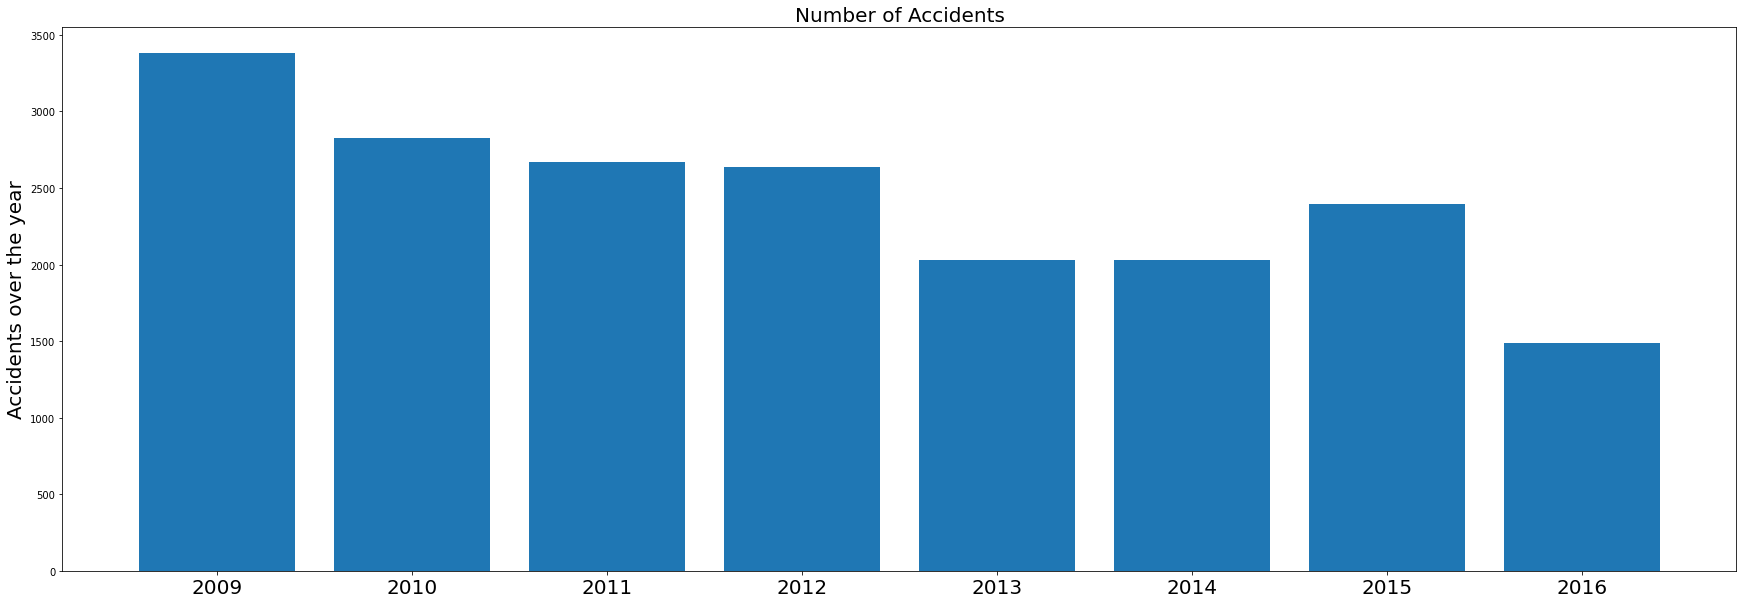

In [83]:
plt.figure(figsize=(30,10))
plt.title("Number of Accidents",size=20)
plt.xticks(ypos,new_df.Year,size=20)
plt.bar(ypos,new_df['Number of Accidents'])
plt.ylabel("Accidents over the year",size=20)

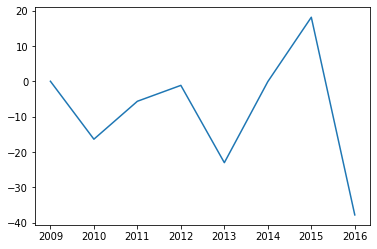

In [84]:
plt.plot(new_df.Year,new_df['Change in Number of Accident'])

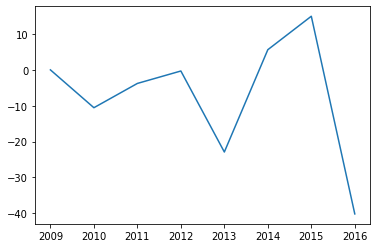

In [85]:
plt.plot(new_df.Year,new_df['Change in Number of Death'])

In [86]:
new_df[3:].sort_values('Death',ascending=False)


1,Year,Number of Accidents,Death,Injury,Change in Number of Accident,Change in Number of Death,Total_Number_of_Accident_victims
3,2012,2636,2538,2134,-1.162355,-0.314218,4672
6,2015,2394,2376,1958,18.105575,14.949202,4334
5,2014,2027,2067,1535,-0.098571,5.620848,3602
4,2013,2029,1957,1396,-23.027314,-22.892041,3353
7,2016,1489,1422,1289,-37.802840,-40.151515,2711


<AxesSubplot:xlabel='Year'>

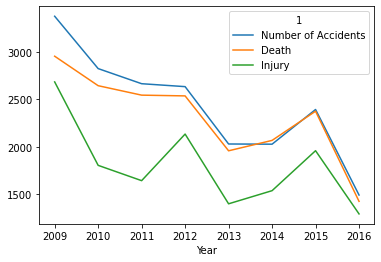

In [90]:
df=new_df.set_index('Year')
df2=['Number of Accidents','Death','Injury']
df3=df[df2]
df3.plot()